<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Matplotlib: Visualization with Python

<a href="http://matplotlib.org" target="_blank"><img src="http://matplotlib.org/_static/logo2.svg" alt="Matplotlib logo" width="500px"/></a>

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

* Create publication quality plots.
* Make interactive figures that can zoom, pan, update.
* Customize visual style and layout.
* Export to many file formats.
* Embed in JupyterLab and Graphical User Interfaces.
* Use a rich array of third-party packages built on Matplotlib.


## Installation and initialization

Install the *matplotlib* module by the following line of code
```
pip install matplotlib
```

Import the *pyplot* package by calling
```
import matplotlib.pyplot as plt
```

Next, we would like to tell the notebook that we want our plots displayed inline, rather than in a separate viewing window

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


The **inline** part was to tell the notebook to use Matplotlib's `nbagg` backend, which work good with the notebook (hence the `nb` in `nbagg`). Matplotlib has multiple "backends" that handle converting Matplotlib's in-memory representation of your plot into the colorful output you can look at. This is done either by writing files (e.g., png, svg, pdf) that you can use an external tool to look at or by embedding into your GUI toolkit of choice (Qt, Tk, Wx, etc).

To check the version of the `matplotlib` the backend used and the current Python version, we will use the following code

In [ ]:
import matplotlib
print(f'The matplotlib version is: {matplotlib.__version__}')
print(f'The matplotlib uses the backend: {matplotlib.get_backend()}')

from platform import python_version
print(f'Python version running: {python_version()}')


The matplotlib version is: 3.2.2
The matplotlib uses the backend: module://ipykernel.pylab.backend_inline
Python version running: 3.7.13


## Our first plot

Let's plot the simple parabola
$$
f(x)=x^2
$$

Text(0.5, 1.0, 'Parabola')

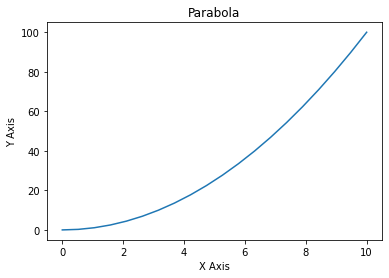

In [ ]:
x = np.linspace(0, 10, 20)
plt.plot(x, x**2)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Parabola')


If you will execute this code inside common IDE (Pycharm, Visual Studio Code, etc.) you will get the following picture. Note, that we use another backbone that requires us to use the command to display the figure
```
plt.show()
```

![](https://github.com/borislevant/python4ml/blob/main/img/matplotlib_pycharm.png?raw=1)

## Anatomy of a "Plot"

People use "plot" to mean many different things. Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

![](https://github.com/borislevant/python4ml/blob/main/img/figure_anatomy_objects.png?raw=1)

The Figure is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple Axes.

Most plotting ocurs on an Axes. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, Axes and Subplot are synonymous.

Each Axes has an XAxis and a YAxis. These contain the ticks, tick locations, labels, etc. In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual Axis part of things all that much. However, it is worth mentioning here to explain where the term Axes comes from.

### Figures

If we want to control properties of the figure, we can explicitly create it with **plt.figure**. For example, we can control the size of the figure through the `figsize` argument, which expects a tuple of **(width, height)**.

Text(0.5, 1.0, 'Parabola')

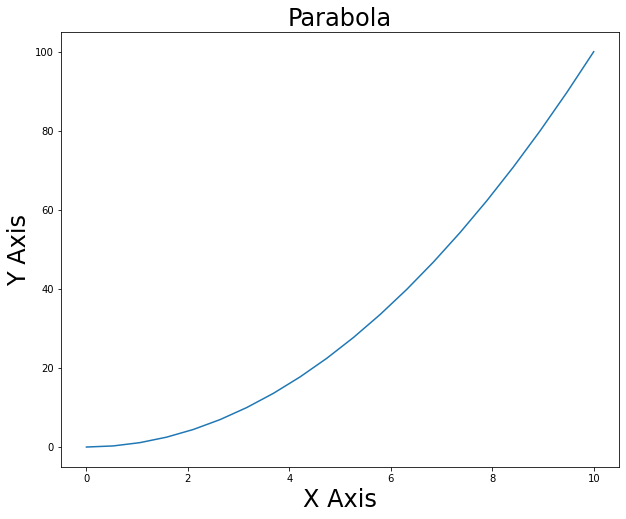

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(x, x**2)
plt.xlabel('X Axis', fontsize=24)
plt.ylabel('Y Axis', fontsize=24)
plt.title('Parabola', fontsize=24)

### Saving the figure

One can always save the figure using the following line of code
```
fig.savefig('filename.png', dpi=300)
```
while the first argument is the path of the file and the DPI (dots-per-inch) argument determines the resolution of the image we want to create


### Axes

We've mentioned before that a figure can have more than one `Axes` on it. 

There are few possibility to add `Axes` to the `Figure` we created. First one is the most flexible one allows to add `Axes` into the given position in the `Figure`:


Text(0.5, 1.0, 'Axes 4')

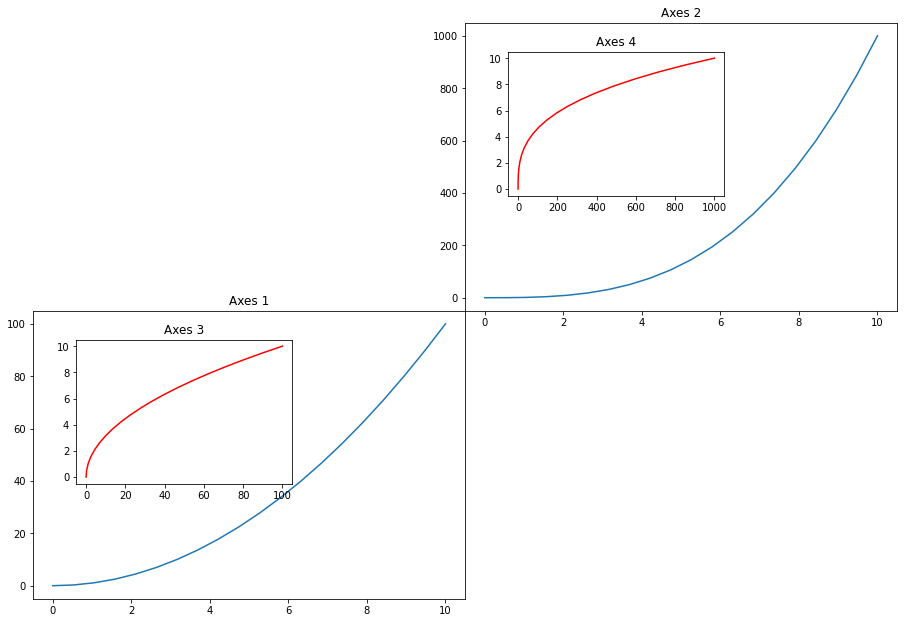

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1, 1, 1, 1])
ax3 = fig.add_axes([0.1, 0.4, 0.5, 0.5])
ax4 = fig.add_axes([1.1, 1.4, 0.5, 0.5])

ax1.plot(x, x**2)
ax1.set_title('Axes 1')
ax2.plot(x, x**3)
ax2.set_title('Axes 2')
ax3.plot(x**2, x, 'r')
ax3.set_title('Axes 3')
ax4.plot(x**3, x, 'r')
ax4.set_title('Axes 4')


Another possibility is to add single axes in the grid using the following 3 numbers notation: the number `232` means that we create the grid of `1` row and `2` columns and we put the axes on the second position:

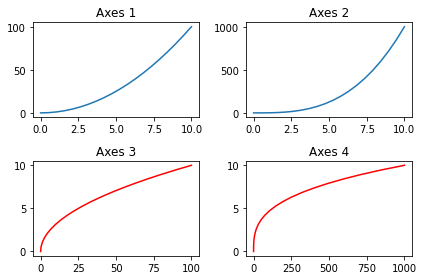

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(x, x**2)
ax1.set_title('Axes 1')
ax2.plot(x, x**3)
ax2.set_title('Axes 2')
ax3.plot(x**2, x, 'r')
ax3.set_title('Axes 3')
ax4.plot(x**3, x, 'r')
ax4.set_title('Axes 4')

fig.tight_layout()

### Multiple Axes in the grid structure

If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

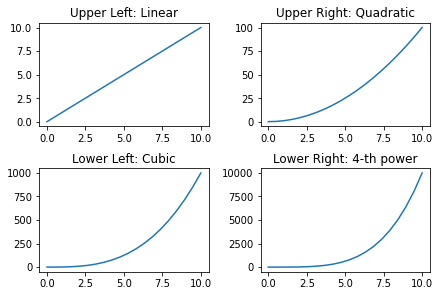

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
axes[0,0].set(title='Upper Left: Linear')
axes[0,1].set(title='Upper Right: Quadratic')
axes[1,0].set(title='Lower Left: Cubic')
axes[1,1].set(title='Lower Right: 4-th power')

# To iterate over all items in a multidimensional numpy array, 
# use the `flat` attribute
# Enumerate returns the tuple (index, value) of the array/list
for i, ax in enumerate(axes.flat):
    ax.plot(x, x**(i+1))


When `plt.subplots` is called with no arguments, it creates a new figure with a single subplot. So this will be our default way of creating a figure and axes.

There are 2 possibilities to automatically align the subplots of the regular grid
* Call the `fig.tight_layout()`
* Use the `constrained_layout=True` property of the `subplots` construtor. This is the prefered method in most cases

### Display properties of the `Axes` object

The most usefull and frequently used properties of the Axes objects are the following:
* `set_title` - sets the title of the `Axes`
* `set_xlabel`/`set_ylabel` - sets the label of the X or Y axis
* `set_xticks`/`set_yticks` - sets the ticks of the X or Y axis
* `set_xtickslabels`/`set_ytickslabels` - sets the labels of the ticks of the X or Y axis. In the example below this is the $\pi$ instead of the numerical value of the ticks

All the above properties have the `fontsize` parameter that allows to control the appearance of the text 

In the following example we show the usage of the properties


Text(0.5, 1.0, 'Cosine Function')

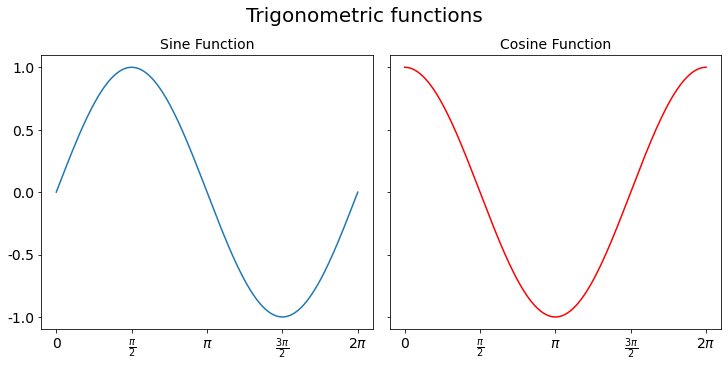

In [ ]:
z = np.linspace(0, 2*np.pi, 200)
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2, constrained_layout=True, sharey=True)
fig.suptitle('Trigonometric functions', fontsize=20)

ax[0].plot(z, np.sin(z))
ax[0].set_xticks(np.linspace(0, 2*np.pi, 5))
ax[0].set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax[0].set_yticks(np.linspace(-1, 1, 5))
ax[0].set_yticklabels(np.linspace(-1, 1, 5), fontsize=14)
ax[0].set_title('Sine Function', fontsize=14)

ax[1].plot(z, np.cos(z), 'r')
ax[1].set_xticks(np.linspace(0, 2*np.pi, 5))
ax[1].set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax[1].set_yticks(np.linspace(-1, 1, 5))
ax[1].set_yticklabels(np.linspace(-1, 1, 5), fontsize=14)
ax[1].set_title('Cosine Function', fontsize=14)


### Legends

If we have a few lines at the same graph it's very convenient to use a `Legend` - a short description of each line. 

Note that we used different colors for two different graphs to distinguish between them


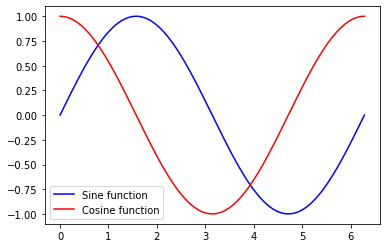

In [ ]:
fig, ax = plt.subplots()
ax.plot(z, np.sin(z), 'b', label='Sine function')
ax.plot(z, np.cos(z), 'r', label='Cosine function')
ax.legend()


## Basic plotting functions

In this section we will cover the basic plotting types
* Plot
* Scatter
* Bar



### Line plots

Schematically, the simple 1-D line plots has the following parameters: Colors of the line, Line types and Markers 

![](https://github.com/borislevant/python4ml/blob/main/img/plot_example.png?raw=1)

Text(0.5, 1.0, 'Sine: black color, dashdotted line, marker of size 10')

<Figure size 1080x720 with 0 Axes>

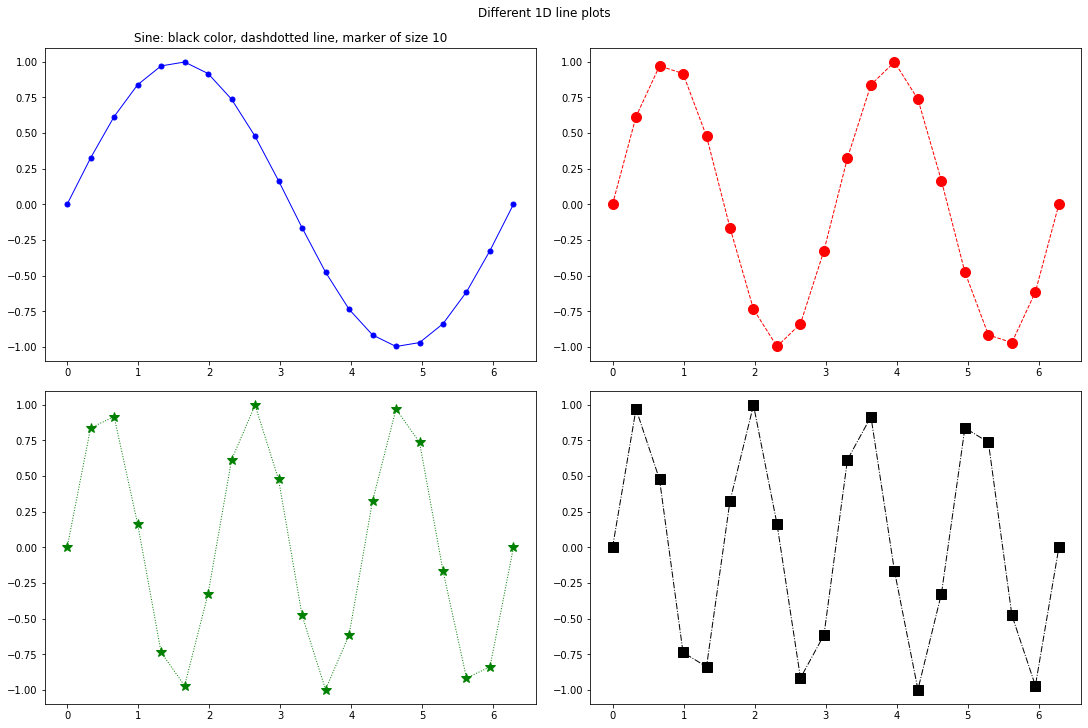

In [ ]:
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(15, 10))
fig.suptitle('Different 1D line plots')

t = np.linspace(0, 2*np.pi, 20)
ax[0, 0].plot(t, np.sin(1*t), color='b', ls='-', lw='1', marker='.', markersize='10')
ax[0, 0].set_title('Sine: blue color, solid line, marker of size 10')

ax[0, 1].plot(t, np.sin(2*t), color='r', ls='--', lw='1', marker='o', markersize='10')
ax[0, 0].set_title('Sine: red color, dashed line, marker of size 10')

ax[1, 0].plot(t, np.sin(3*t), color='g', ls=':', lw='1', marker='*', markersize='10')
ax[0, 0].set_title('Sine: green color, dotted line, marker of size 10')

ax[1, 1].plot(t, np.sin(4*t), color='k', ls='-.', lw='1', marker='s', markersize='10')
ax[0, 0].set_title('Sine: black color, dashdotted line, marker of size 10')


**Colors** can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Matplotlib also understands  `{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}` which are the Tableau Colors from the ‘T10’ categorical palette (and the default color cycle)

**[Markers](http://matplotlib.org/api/markers_api.html)** are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

**Line** styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

### Scatter plots

A scatter plot is a type of data visualization that is used to show the relationship between two variables. Scatter plots are used in data science and statistics to show the distribution of data points, and they can be used to identify trends and patterns. Scatter plots are a type of graph that shows the scatter plot for data points. These plots are created by using a set of X and Y-axis values. The X-axis can be used to represent one of the independent variables, while the Y-axis can be used to represent the other independent variables or dependent variable. 

Schematically, the simple 1-D scatter plots has the following parameters:

![](https://github.com/borislevant/python4ml/blob/main/img/scatter_example.png?raw=1)

In order to show examples of the `Scatter` we will load the Iris flowers dataset - a famous example published by the British statistician and biologist Ronald Fisher in his 1936 paper. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

![](https://github.com/borislevant/python4ml/blob/main/img/iris-machinelearning.png?raw=1)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
x_labels = iris.feature_names
y_labels = iris.target_names
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

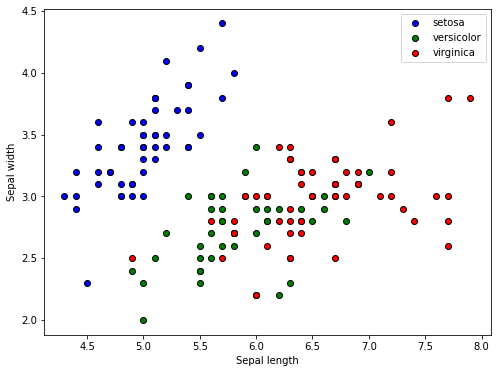

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X[y==0, 0], X[y==0, 1], c='b', edgecolor="k", label=y_labels[0])
ax.scatter(X[y==1, 0], X[y==1, 1], c='g', edgecolor="k", label=y_labels[1])
ax.scatter(X[y==2, 0], X[y==2, 1], c='r', edgecolor="k", label=y_labels[2])

ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.legend()


In this graph we observe the Sepal width and length of different types of Iris is distributed. We clearly see, for example, that based on those two features we can discriminate with high cnfidence between the `Setosia` and other Irises

Such kind of graphs are very useful in Data analysis at the early stage of the machine learning model developement


### Bar plots

Bar plots are usefull way to visualize the quantities of the different types of data or plottin the hystograms. 

Schematically, the Bar plots has the following parameters:

![](https://github.com/borislevant/python4ml/blob/main/img/bar_example.png?raw=1)

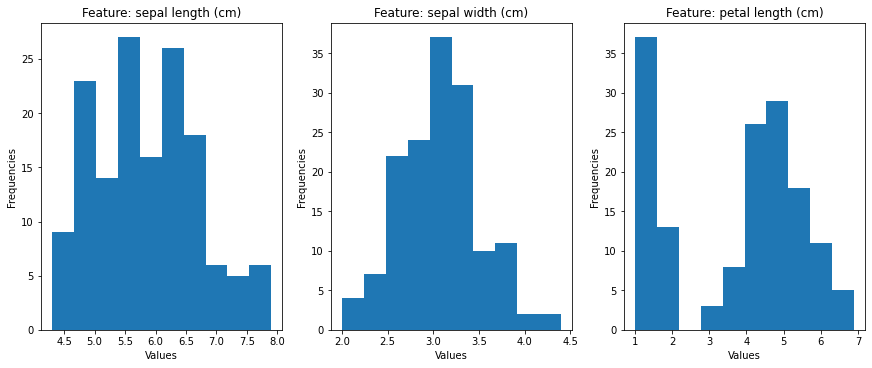

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(12, 5))

for i, a in enumerate(ax):
    a.hist(X[:, i])
    a.set_title(f'Feature: {x_labels[i]}')
    a.set_xlabel('Values')
    a.set_ylabel('Frequencies')


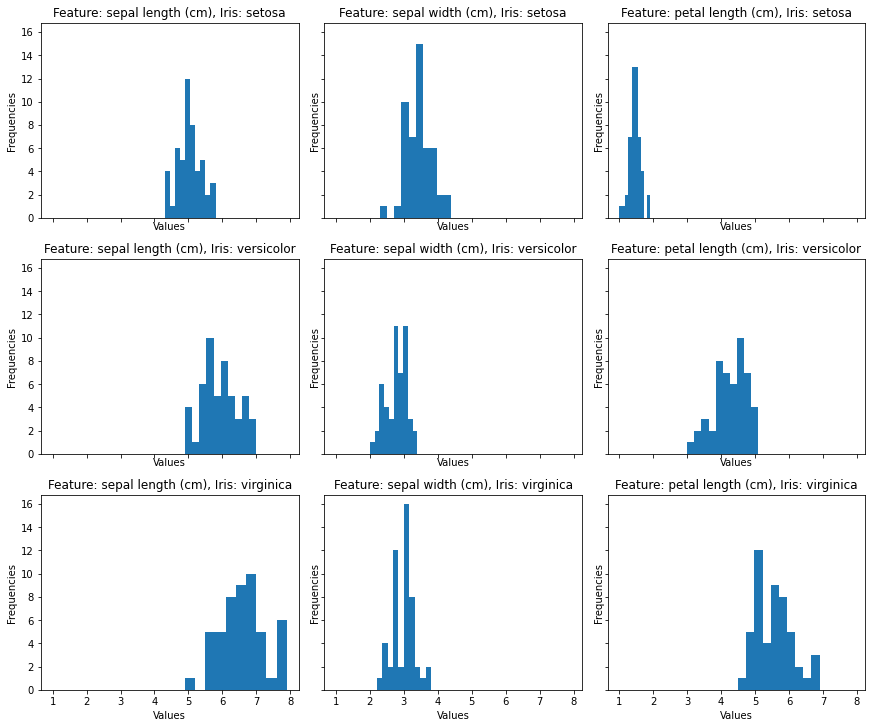

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, constrained_layout=True, figsize=(12, 10), sharex=True, sharey=True)

for i in range(3): # iterate over Iris types
    for f in range(3): # iterate over features
        ax[i, f].hist(X[y==i, f])
        ax[i, f].set_title(f'Feature: {x_labels[f]}, Iris: {y_labels[i]}')
        ax[i, f].set_xlabel('Values')
        ax[i, f].set_ylabel('Frequencies')

Now let's visualize some quantities of the data

Text(0, 0.5, 'Average sepal_length')

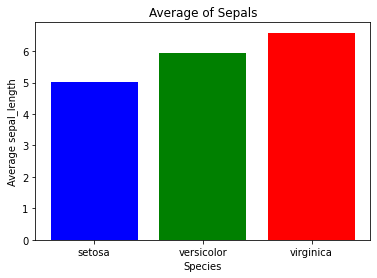

In [ ]:
sepal_means = np.array([np.mean(X[y==i, 0]) for i in range(3)])

plt.bar(y_labels, sepal_means, color=['b', 'g', 'r']) 
plt.title('Average of Sepals')
plt.xlabel('Species')
plt.ylabel('Average sepal_length') 


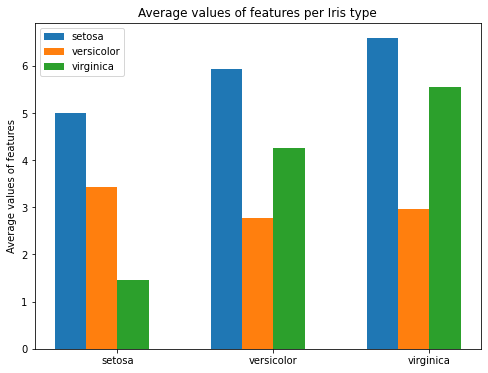

In [ ]:
sepal_length = np.array([np.mean(X[y==i, 0]) for i in range(3)])
sepal_width = np.array([np.mean(X[y==i, 1]) for i in range(3)])
petal_length = np.array([np.mean(X[y==i, 2]) for i in range(3)])

fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(3)
width = 0.6  # the width of the bars
sl = ax.bar(x - 0.3, sepal_length, 0.2, label=y_labels[0])
sw = ax.bar(x - 0.1, sepal_width, 0.2, label=y_labels[1])
pl = ax.bar(x + 0.1, petal_length, 0.2, label=y_labels[2])

ax.set_ylabel('Average values of features')
ax.set_title('Average values of features per Iris type')
ax.set_xticks(x)
ax.set_xticklabels(y_labels)
ax.legend()


## Exercise 1



Next lets do a box plot -- Matplotlib will calculate the boxes for us.

- `medianprops` is a dictionary that contains extra properties for the median.
- `plt.xticks` determines where the ticks will be drawn (1st argument) and what they will say (2nd argument).

## Exercise 2

`plot` draws points with lines connecting them. 
But there are other plotting functions - a useful one is `bar`, which draws bars.

**Plot the max of each patient using a [bar-plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html).**

# References

- **[Matplotlib gallery](https://github.com/rasbt/matplotlib-gallery)**
- [Anatomy of Matplotlib](https://github.com/WeatherGod/AnatomyOfMatplotlib) tutorial by [Benjamin Root](https://github.com/WeatherGod).
- Slides: [Introduction to NumPy, SciPy, and matplotlib](https://speakerdeck.com/cfinch/introduction-to-numpy-scipy-and-matplotlib) by Craig Finch.
- Notebooks: [Long Matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
- [How to speak Matplotlib](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb) - control colors, markers, linestyles, plot attributes, colormaps, annotations, arrows, hatches, transforms, and rc configuration.
- [Limits, legends, & layouts](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part4-Limits_Legends_and_Layouts.ipynb)- [Why People Hate Jet – and You Should Too](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- Jake Vanderplas's [Minesweeper in Matplotlib](https://jakevdp.github.io/blog/2012/12/06/minesweeper-in-matplotlib/), [Quaternions and Key Bindings: Simple 3D Visualization in Matplotlib](http://jakevdp.github.io/blog/2012/11/24/simple-3d-visualization-in-matplotlib/) and [3D Interactive Rubik's Cube in Python](http://jakevdp.github.io/blog/2012/11/26/3d-interactive-rubiks-cube-in-python/) are amazing examples of what can be done with Matplotlib beyond simple plots and using a GUI.
- [Interactive plotting basics in matplotlib](https://waterprogramming.wordpress.com/2016/04/29/interactive-plotting-basics-in-matplotlib/)
- [Python Plotting With Matplotlib (Guide)](https://realpython.com/python-matplotlib-guide/)


# Nice Examples

* Pareto plots with Matplotlib ([Medium](https://levelup.gitconnected.com/how-to-make-pareto-chart-in-matplotlib-ff9b6ec7fadf), [GitHub](https://github.com/pawjast/medium/blob/main/code/2_pareto_chart.ipynb))
